In [1]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
%pip install xgboost==2.1.3 scikit-learn==1.5.2 


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Step 1: Loading the dataset

import pandas as pd
import sklearn
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (614, 8)
Testing Set Shape: (154, 8)


In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [7]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [8]:
#Step 2: Build a boosting

model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [9]:
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)

print("Boosting Model Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Boosting Model Classification Report:\n", classification_report(y_test, y_pred_boosting))

Boosting Model Accuracy: 0.7467532467532467
Boosting Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
accuracy_score(y_test, y_pred)

0.7077922077922078

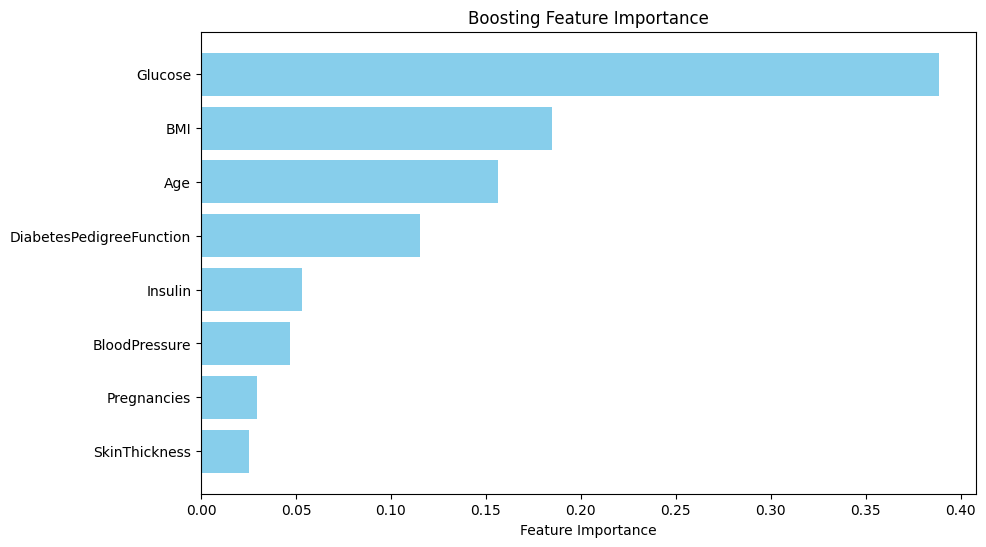

In [12]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = boosting_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Boosting Feature Importance")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

grid_search_boosting = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
)

grid_search_boosting.fit(X_train, y_train)

print("Best Parameters for Boosting:", grid_search_boosting.best_params_)
print("Best Cross-Validation Accuracy for Boosting:", grid_search_boosting.best_score_)

optimized_boosting = grid_search_boosting.best_estimator_
y_pred_optimized_boosting = optimized_boosting.predict(X_test)

print("Optimized Boosting Model Accuracy:", accuracy_score(y_test, y_pred_optimized_boosting))
print("Optimized Boosting Model Classification Report:\n", classification_report(y_test, y_pred_optimized_boosting))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.3s
[CV] END ..learning_rate=0.0

In [14]:
#Step 3: Save the model

model.save_model("xgb_classifier_default_42.json")

In [15]:
#Step 4: Analyze and compare model results

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_optimized_boosting))

Decision Tree Accuracy: 0.7467532467532467
Random Forest Accuracy: 0.7207792207792207
Boosting Accuracy: 0.7142857142857143


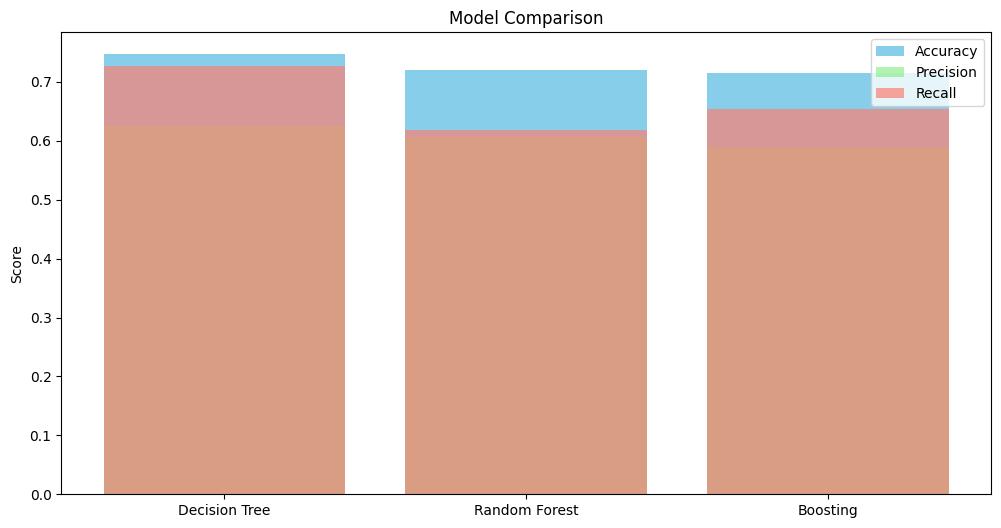

In [16]:
from sklearn.metrics import precision_score, recall_score

models = ["Decision Tree", "Random Forest", "Boosting"]
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_optimized_boosting),
]

precision_scores = [
    precision_score(y_test, y_pred_tree),
    precision_score(y_test, y_pred_forest),
    precision_score(y_test, y_pred_optimized_boosting),
]

recall_scores = [
    recall_score(y_test, y_pred_tree),
    recall_score(y_test, y_pred_forest),
    recall_score(y_test, y_pred_optimized_boosting),
]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color="skyblue", label="Accuracy")
plt.bar(models, precision_scores, color="lightgreen", alpha=0.7, label="Precision")
plt.bar(models, recall_scores, color="salmon", alpha=0.7, label="Recall")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.legend()
plt.show()

It seems that the boosting algorithm yields the best accuracy overall.